In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import yfinance

import sys
sys.path.append("../quant_research_toolbox")
from strategies import *
from utils import *
from risk import *
from plots import *

In [3]:
df_aapl = load_ticker_data("AAPL", start_date="2015-01-01", end_date="2025-06-01")
df_aapl.head()

/home/onyxia/work/quant_research_toolbox/notebooks/../quant_research_toolbox/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker_name, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,close,high,low,open,volume,ohlc_price,typical_price,median_price
Date,,,,,,,,
2015-01-02,24.288576,24.757330,23.848702,24.746222,212818400,24.410208,24.298203,24.303016
2015-01-05,23.604338,24.137518,23.417725,24.057541,257142000,23.804281,23.719860,23.777622
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400,23.596560,23.572493,23.555461
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,23.873701,23.893140,23.870924
2015-01-08,24.857315,24.915077,24.148629,24.266374,237458000,24.546849,24.640340,24.531853


<Axes: xlabel='Date'>

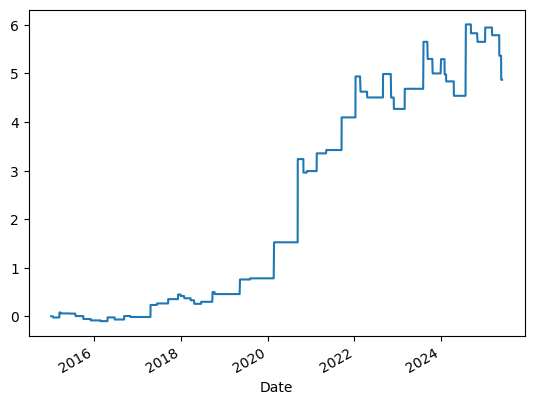

In [4]:
df_sc = Momentum.sma_crossover(df_aapl, "ohlc_price")
df_sc["cumulative_returns"].plot()

In [6]:
print(Drawdown.max_drawdown(df_sc["cumulative_returns"]))
print(Drawdown.average_drawdown(df_sc["cumulative_returns"]))
print(Drawdown.drawdown_duration(df_sc["cumulative_returns"]))
print(Drawdown.drawdown_duration(df_sc["cumulative_returns"], "median"))
print(Drawdown.drawdown_duration(df_sc["cumulative_returns"], "mean"))

-0.16717487409123188
-0.10423260413628403
521.0
181.0
186.88888888888889


In [11]:
Drawdown.daily_drawdown(df_sc["cumulative_returns"]).tail(530)

Date
2023-04-20   -0.050806
2023-04-21   -0.050806
2023-04-24   -0.050806
2023-04-25   -0.050806
2023-04-26   -0.050806
                ...   
2025-05-23   -0.162574
2025-05-27   -0.162574
2025-05-28   -0.162574
2025-05-29   -0.162574
2025-05-30   -0.162574
Name: cumulative_returns, Length: 530, dtype: float64